<a href="https://colab.research.google.com/github/felipemorinishi/Projetos-Turing_USP/blob/Projetos_Turing_Academy/Projeto2_Academy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('neo.csv')

##Preprocessamento

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
df.describe(include=['object', 'bool'])

,name,orbiting_body,sentry_object,hazardous
count,90836,90836,90836,90836
unique,27423,1,1,2
top,469219 Kamo`oalewa (2016 HO3),Earth,False,False
freq,43,90836,90836,81996


A partir do método describe, incluindo as features objeto e booleanas, vemos que elas devem ser descartadas do modelo de predição. A variável 'name', por justamente apenas indicar o nome do asteróide. As variáveis 'orbiting_body' e 'sentry_object' por terem apenas um valor único.

In [7]:
df = df.drop(['id','name', 'orbiting_body', 'sentry_object'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


Agora iremos transformar a nossa target em uma feature inteira, substituindo 'False' por 0 e 'True' por 1.

In [9]:
df['hazardous'] = df['hazardous'].apply(lambda val:
                                        1 if val == True else 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


##Análise das features

Primeiramente, vamos observar rapidamente quais são as correlações entre as variáveis utilizando um heatmap.

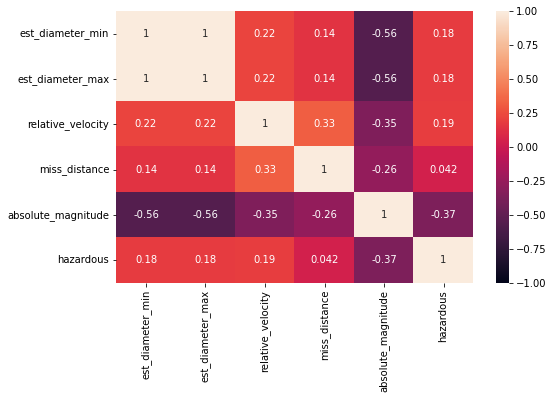

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

Com relação à nossa variável target, temos que a feature 'absolute_magnitude', ou seja, a luminosidade intrínseca ao asteróide, possui a maior correlação absoluta dentre as features. 'est_diameter_min', 'est_diameter_max' e 'relative_velocity' estão na faixa de 0.18~0.19, e 'miss_distance' se destaca por ter a menor correlação com a variável target, de 0.042.

Agora iremos dividir o dataset em 2 para comparar as distribuições dos asteróides considerados perigosos ou não, entre as features que serão utilizadas.

In [ ]:
df_haz = df[df['hazardous'] == 1]
df_nhaz = df[df['hazardous'] == 0]

###Diametro do asteróide

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


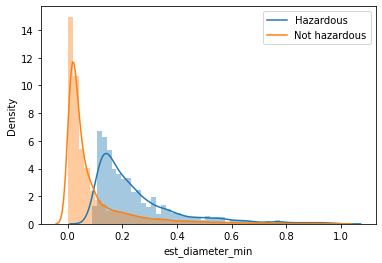

In [ ]:
#Obs. Optou-se por utilizar o intervalo [0, 1] da distribuição porque a maioria das observações se concentrava dentro dele.
p_1 = df_haz.query('0 < est_diameter_min < 1')
p_2 = df_nhaz.query('0 < est_diameter_min < 1')

sns.distplot(p_1['est_diameter_min'])
sns.distplot(p_2['est_diameter_min'])
plt.legend(['Hazardous', 'Not hazardous'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


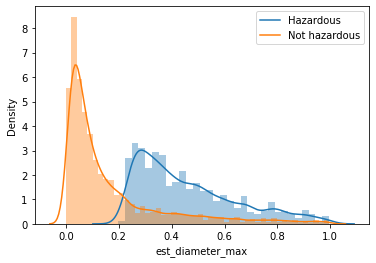

In [ ]:
p_3 = df_haz.query('0 < est_diameter_max < 1')
p_4 = df_nhaz.query('0 < est_diameter_max < 1')

sns.distplot(p_3['est_diameter_max'])
sns.distplot(p_4['est_diameter_max'])
plt.legend(['Hazardous', 'Not hazardous'])

Vemos nos gráficos acima que os asteróides perigosos possuem  em média um diâmetro, tanto mínimo quanto máximo, maiores do que os asteróides não perigosos.

###Velocidade relativa


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


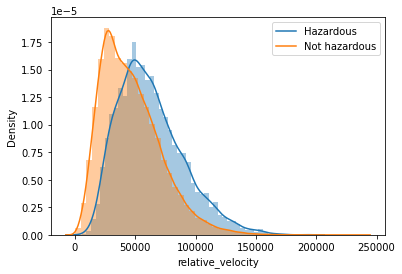

In [ ]:
sns.distplot(df_haz['relative_velocity'])
sns.distplot(df_nhaz['relative_velocity'])
plt.legend(['Hazardous', 'Not hazardous'])

Podemos ver que a curva de velocidade relativa dos asteróides perigosos se localiza mais a direita em relação à curva dos asteróides inofensivos, de modo que se pode afirmar que sua velocidade relativa média é maior.

###Distância perdida

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


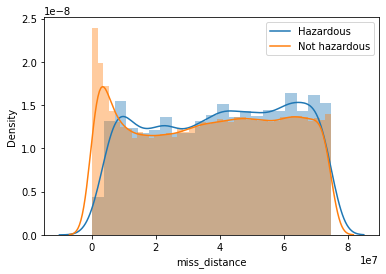

In [ ]:
sns.distplot(df_haz['miss_distance'])
sns.distplot(df_nhaz['miss_distance'])
plt.legend(['Hazardous', 'Not hazardous'])

Vemos aqui que as distribuições da distância perdida é muito parecida entre ambos os tipos de asteróide. Apesar disso, os não perigosos apresentam maior densidade no intervalo entre 0km e 1km perdido, enquanto os perigosos apresentam uma maior densidade, ainda que pequena, em valores maiores.

###Magnitude Absoluta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


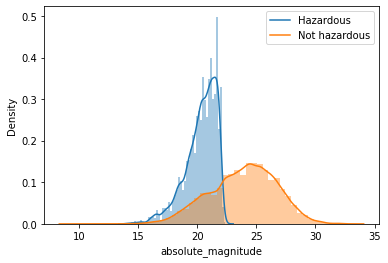

In [ ]:
sns.distplot(df_haz['absolute_magnitude'])
sns.distplot(df_nhaz['absolute_magnitude'])
plt.legend(['Hazardous', 'Not hazardous'])

Aqui podemos ver uma diferença enorme entre as duas distribuições: enquanto os asteróides não perigosos apresentam uma luminosidade intrínseca média aproximada de 25, os perigosos se concentram no intervalo entre 20 e 23.

##Criação do Modelo

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


In [12]:
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.metrics import Recall, AUC

Separando as features da varável target

In [13]:
X = df.iloc[:, 0:5].values
y = to_categorical(df.iloc[:, 5])

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
n_cols = X_train.shape[1]

###Modelo 1

In [18]:
modelo = Sequential()

In [19]:
modelo.add(Dense(25, input_shape=(n_cols,), use_bias=False))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dense(15, use_bias=False))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dense(2, activation='softmax'))

In [20]:
parar = EarlyStopping(patience=2)

In [21]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
hist = modelo.fit(X_train, y_train, shuffle=True, epochs=25, validation_split=0.25, callbacks=parar)

Epoch 1/25
1491/1491 [==============================] - 6s 3ms/step - loss: 0.2398 - accuracy: 0.9002 - val_loss: 0.1944 - val_accuracy: 0.9138
Epoch 2/25
1491/1491 [==============================] - 4s 2ms/step - loss: 0.2084 - accuracy: 0.9075 - val_loss: 0.1913 - val_accuracy: 0.9144
Epoch 3/25
1491/1491 [==============================] - 4s 3ms/step - loss: 0.2076 - accuracy: 0.9076 - val_loss: 0.1914 - val_accuracy: 0.9142
Epoch 4/25
1491/1491 [==============================] - 5s 3ms/step - loss: 0.2061 - accuracy: 0.9084 - val_loss: 0.1888 - val_accuracy: 0.9155
Epoch 5/25
1491/1491 [==============================] - 5s 3ms/step - loss: 0.2057 - accuracy: 0.9085 - val_loss: 0.1879 - val_accuracy: 0.9151
Epoch 6/25
1491/1491 [==============================] - 7s 5ms/step - loss: 0.2052 - accuracy: 0.9085 - val_loss: 0.1871 - val_accuracy: 0.9163
Epoch 7/25
1491/1491 [==============================] - 6s 4ms/step - loss: 0.2039 - accuracy: 0.9091 - val_loss: 0.1875 - val_accuracy:

In [23]:
y_pred = modelo.predict(X_test, batch_size=256, verbose=0)

In [24]:
y_pred_classes = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test, axis=-1)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [26]:
matriz_confusao = confusion_matrix(y_true=y_test2, y_pred=y_pred_classes)

In [27]:
mc_classes = ['Non Hazardous', 'Hazardous']
mc = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=mc_classes)

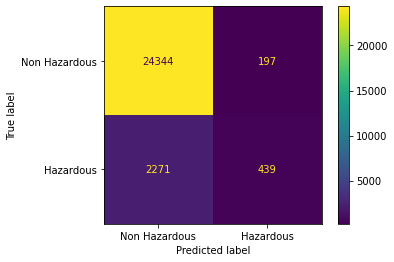

In [28]:
mc.plot()
plt.show()

In [29]:
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     24541
           1       0.69      0.16      0.26      2710

    accuracy                           0.91     27251
   macro avg       0.80      0.58      0.61     27251
weighted avg       0.89      0.91      0.88     27251



Como vimos acima, a rede neural apresentou um bom desempenho quando se tratava de classificar asteróides não perigosos. Porém, apresentou um péssimo desempenho para classificar corretamente os que eram de fato perigosos. Isso não foi visto durante o treino, nem com os dados de validação, de modo que podemos dizer que o modelo underfitou.

###Salvando o modelo

In [30]:
from keras.models import load_model

In [31]:
modelo.save('RedeNeuralAsteroide.h5')